In [ ]:
import tensorflow as tf

In [ ]:
X = tf.range(0, 100, 2)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [ ]:
y = 2*X + 3
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199], dtype=int32)>

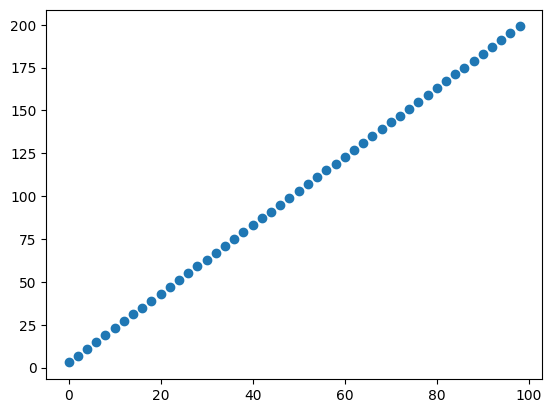

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

# Model Building

In [ ]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# train the model
model.fit(X, y, epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 90.8523 - mae: 90.8523
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 88.0588 - mae: 88.0588
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 80.1809 - mae: 80.1809
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 70.7452 - mae: 70.7452
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 65.6483 - mae: 65.6483
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 58.9068 - mae: 58.9068
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 49.8919 - mae: 49.8919
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 40.8437 - mae: 40.8437
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 35.6832 - mae: 35.6832
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 24.9027 - mae: 24.9027
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.4864 - mae: 16.4864
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.5677 - mae: 7.5677
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
import numpy as np
model.predict(np.array([[150], [-10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


array([[303.09238 ],
       [-17.530643]], dtype=float32)

In [ ]:
X = 150
y = 2*X + 3
y

303

In [ ]:
X = -10
y = 2*X + 3
y

-17

# Save model using SavedModel format

In [ ]:
model.save('new_model_1.keras')

# Save model using HDF5 format

In [ ]:
model.save('new_model_2.h5')

# Load model using SavedModel format

In [ ]:
import tensorflow as tf
new_model_1 = tf.keras.models.load_model('new_model_1.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
new_model_1.predict(np.array([[150], [-10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[303.09238 ],
       [-17.530643]], dtype=float32)

In [ ]:
new_model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (260.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33 (136.00 B)

# Load model using HDF5 format

In [ ]:
import tensorflow as tf
new_model_2 = tf.keras.models.load_model('new_model_2.h5')

In [ ]:
new_model_2.predict(np.array([[150], [-10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[303.09238 ],
       [-17.530643]], dtype=float32)